<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU53_impacto de las políticas de inversión en sanidad, infraestructuras y promoción turística en el SPI			</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > III - Feature Engineering Domain </font>
***
> # <font color='steelblue'> <b>17.- Feature Extraction</font>

<font color='steelblue'>Feature Extraction is the process related to dimensionality reduction (or dimension reduction) that creates a projection of the data (high-dimensional space) resulting in entirely new input features (low-dimensional space), so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension.</font>


## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Perform LDA-Dimensionality-Reduction</b>
- Evaluate a Naive Bayes model
- Explore the-change-model-performance-with-the-number-of-selected-components.
- Making-a-prediction-with-model-fit-on-data-after-applying-an-LDA-transform.
    
<font color='steelblue'><b>Perform PCA-Dimensionality-Reduction</b>	
- Evaluate a Logistic Regression model
- Explore the-change-model-performance-with-the-number-of-selected-components.
- Making-a-prediction-with-model-fit-on-data-after-applying-an-LDA-transform.
    
<font color='steelblue'><b>Perform SVD-Dimensionality-Reduction</b>	
- Evaluate a Logistic Regression model
- Explore the-change-model-performance-with-the-number-of-selected-components.
- Making-a-prediction-with-model-fit-on-data-after-applying-an-LDA-transform.

    


## Consideraciones casos CitizenLab programados en R

* Algunas de las tareas de este proceso se han realizado en los notebooks del proceso 05 Data Collection porque eran necesarias para las tareas ETL. En esos casos, en este notebook se referencia al notebook del proceso 05 correspondiente
* Otras tareas típicas de este proceso se realizan en los notebooks del dominio IV al ser más eficiente realizarlas en el propio pipeline de modelización.
* Por tanto en los notebooks de este proceso de manera general se incluyen las comprobaciones necesarias, y comentarios si procede
* Las tareas del proceso se van a aplicar solo a los archivos que forman parte del despliegue, ya que hay muchos archivos intermedios que no procede pasar por este proceso
* El nombre de archivo del notebook hace referencia al nombre de archivo del proceso 05 al que se aplica este proceso, por eso pueden no ser correlativa la numeración
* Las comprobaciones se van a realizar teniendo en cuenta que el lenguaje utilizado en el despliegue de este caso es R

## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_53_14_02_spi</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_CTYPE=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8;LC_COLLATE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=es_ES.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=es_ES.UTF-8;LC_IDENTIFICATION=C"

## <font color='green'>Settings</font>

### Libraries to use

In [2]:
library(readr)
library(dplyr)
library(tidyr)
library(forcats)
library(lubridate)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Paths

In [3]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [4]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [4]:
iFile <- "CU_53_14_02_spi.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_53_14_02_spi.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [5]:
data <- read_csv(file_data)


Rows: 2028 Columns: 18
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (17): rank_score_spi, score_spi, score_bhn, score_fow, score_opp, score_...
lgl  (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Estructura de  los datos:

In [6]:
data |> glimpse()

Rows: 2,028
Columns: 18
$ rank_score_spi <dbl> 80, 97, 46, 84, 99, 150, 74, 105, 36, 143, 154, 69, 168…
$ score_spi      <dbl> 0.234430921, -0.247745795, 0.644506738, -0.070067671, -…
$ score_bhn      <dbl> 0.4097479, 0.1290857, 0.5753443, 0.4274030, 0.3293843, …
$ score_fow      <dbl> 0.22131225, -0.67087093, 0.55485637, -0.04224433, -0.26…
$ score_opp      <dbl> 0.040287945, -0.176082184, 0.684177595, -0.557195503, -…
$ score_nbmc     <dbl> 0.4417846, -0.4611703, 0.4195220, 0.2610630, 0.5105377,…
$ score_ws       <dbl> 0.5398626, 0.3861578, 0.6209430, 0.1056095, 0.1274964, …
$ score_sh       <dbl> 0.6722671, 0.1921862, 0.7589734, 0.5545286, 0.6229812, …
$ score_ps       <dbl> -0.451618611, 0.297686264, 0.192315395, 0.822032832, -0…
$ score_abk      <dbl> 0.038575928, -1.291936532, 0.767026841, -0.404764773, -…
$ score_aic      <dbl> 0.65139291, -1.02544160, 0.37750377, -0.38712186, 0.831…
$ score_hw       <dbl> -0.17460539, 0.46862381, 0.28376095, 0.31816759, -0.652…
$ score_eq      

Muestra de los primeros datos:

In [7]:
data |> slice_head(n = 5)

rank_score_spi,score_spi,score_bhn,score_fow,score_opp,score_nbmc,score_ws,score_sh,score_ps,score_abk,score_aic,score_hw,score_eq,score_pr,score_pfc,score_incl,score_aae,is_train
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
80,0.23443092,0.4097479,0.22131225,0.04028795,0.4417846,0.5398626,0.6722671,-0.4516186,0.03857593,0.6513929,-0.1746054,0.1459135,0.49893581,-0.1770549,-0.412651603,0.1372673,TRUE
97,-0.24774579,0.1290857,-0.67087093,-0.17608218,-0.4611703,0.3861578,0.1921862,0.2976863,-1.29193653,-1.0254416,0.4686238,-0.1242652,0.02236525,0.1217203,0.380048297,-1.1496947,TRUE
46,0.64450674,0.5753443,0.55485637,0.68417760,0.4195220,0.6209430,0.7589734,0.1923154,0.76702684,0.3775038,0.2837610,0.4969887,0.89103387,0.3137906,0.997036708,0.1445618,TRUE
84,-0.07006767,0.4274030,-0.04224433,-0.55719550,0.2610630,0.1056095,0.5545286,0.8220328,-0.40476477,-0.3871219,0.3181676,0.6807734,-0.40632266,-0.4291470,0.009655802,-1.2085719,TRUE
99,-0.16212549,0.3293843,-0.26860033,-0.50440793,0.5105377,0.1274964,0.6229812,-0.1990627,-0.86329199,0.8315709,-0.6527993,-0.5169670,-0.45827120,-0.2884290,-0.645769408,-0.3842909,TRUE


## LDA Dimensionality Reduction

### Evaluating a Naive Bayes model

<font color='tomato'>Selecting number of components</font>

In [8]:
# Select number of components
number_components=5

<font color='darkgrey'><b>Operation</font>

### Exploring the change model performance with the number of selected components.

<font color='tomato'>Selecting number of components</font>

In [9]:
# Select range of components
# LDA is limited in the number of components used in the dimensionality 
# reduction to between the number of classes minus one
# e.g. if num of class in Target=10, range=1..9
number_components_i=1
number_components_f=9


<font color='darkgrey'><b>Operation</font>

### Making a prediction with model fit on data after applying an LDA transform.

<font color='tomato'>Selecting number of components</font>

In [10]:
# Select number of components
number_components=9

<font color='darkgrey'><b>Operation</font>

## PCA Dimensionality Reduction

### Evaluating a Logistic Regression model

<font color='tomato'>Selecting number of components</font>

In [12]:
# Select number of components
number_components=10

<font color='darkgrey'><b>Operation</font>

In [13]:
train_set <- subset(data[data$is_train == TRUE, ], select = -is_train)
train_set <- select_if(train_set, is.numeric)
test_set <- subset(data[data$is_train == FALSE, ], select = -is_train)
test_set <- select_if(test_set, is.numeric)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     48.9331 1.31136 0.63448 0.60774 0.55163 0.46472 0.45051
Proportion of Variance  0.9984 0.00072 0.00017 0.00015 0.00013 0.00009 0.00008
Cumulative Proportion   0.9984 0.99913 0.99930 0.99946 0.99958 0.99967 0.99976
                           PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     0.40936 0.33901 0.31786 0.29047 0.24264 0.23479
Proportion of Variance 0.00007 0.00005 0.00004 0.00004 0.00002 0.00002
Cumulative Proportion  0.99983 0.99988 0.99992 0.99995 0.99998 1.00000
                            PC14      PC15      PC16      PC17
Standard deviation     0.0001819 0.0001753 0.0001698 0.0001609
Proportion of Variance 0.0000000 0.0000000 0.0000000 0.0000000
Cumulative Proportion  1.0000000 1.0000000 1.0000000 1.0000000

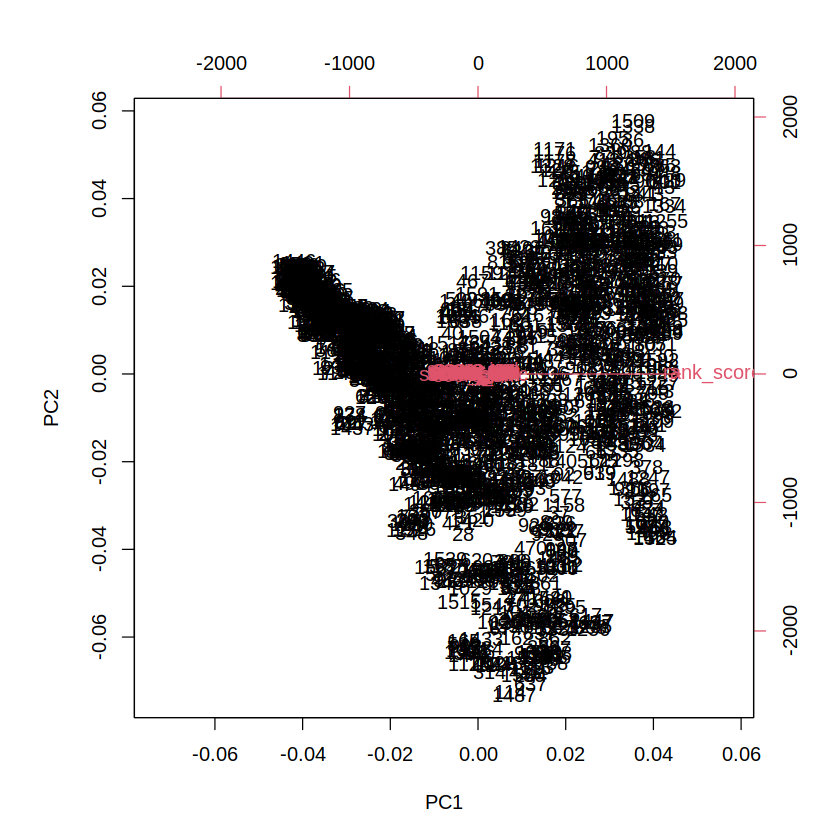

In [14]:
# Realizar el análisis PCA
pca_result <- prcomp(train_set)

# Ver los resultados del PCA
summary(pca_result)

# Para visualizar los resultados del PCA, puedes usar un biplot
biplot(pca_result)


### Exploring the change model performance with the number of selected components.

<font color='tomato'>Selecting number of components</font>

In [13]:
# Select range of components
number_components_i=1
number_components_f=20


<font color='darkgrey'><b>Operation</font>

### Making a prediction with model fit on data after applying an LDA transform.

<font color='tomato'>Selecting number of components</font>

In [14]:
# Select number of components
number_components=15

<font color='darkgrey'><b>Operation</font>

## SVD Dimensionality Reduction

### Evaluating a Logistic Regression model

<font color='tomato'>Selecting number of components</font>

In [15]:
# Select number of components
number_components=10

<font color='darkgrey'><b>Operation</font>

### Exploring the change model performance with the number of selected components.

<font color='tomato'>Selecting number of components</font>

In [16]:
# Select range of components
number_components_i=1
number_components_f=19 # max = Number of features - 1


<font color='darkgrey'><b>Operation</font>

### Making a prediction with model fit on data after applying an LDA transform.

<font color='tomato'>Selecting number of components</font>

In [17]:
# Select number of components
number_components=15

<font color='darkgrey'><b>Operation</font>

## <font color='green'>Data Save</font>

* Solo si se han hecho cambios

* No aplica

<font color='tomato'> Identificamos los datos a guardar</font>

In [18]:
data_to_save <- data


<font color='tomato'>Estructura de nombre de archivos:</font>

* Código del caso de uso, por ejemplo "CU_04"
* Número del proceso que lo genera, por ejemplo "_06".
* Resto del nombre del archivo de entrada
* Extensión del archivo

Ejemplo: "CU_04_06_01_01_zonasgeo.json, primer fichero que se genera en la tarea 01 del proceso 05 (Data Collection) para el caso de uso 04 (vacunas) y que se ha transformado en el proceso 06

Importante mantener los guiones bajos antes de proceso, tarea, archivo y nombre

### Proceso 17

In [20]:
caso <- "CU_18"
proceso <- '_17'
tarea <- "_20"
archivo <- ""
proper <- "_diario_infra"
extension <- ".csv"

<font color='tomato'><b> OPCION A:</b> Uso del paquete "tcltk" para mayor comodidad</font>

* Buscar carpeta, escribir nombre de archivo SIN extensión (se especifica en el código)
* Especificar sufijo2 si es necesario
* Cambiar datos por datos_xx si es necesario

In [21]:
# file_save <- paste0(caso, proceso, tarea, tcltk::tkgetSaveFile(), proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>

- Los ficheros de salida del proceso van siempre a Data/Output/.  

In [22]:
# file_save <- paste0(caso, proceso, tarea, archivo, proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

#### Copia del fichero a Input

Si el archivo se va a usar en otros notebooks, copiar a la carpeta Input

In [23]:
# path_in <- paste0(iPath, file_save)
# file.copy(path_out, path_in, overwrite = TRUE)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

- Si eran necesarias se han realizado en el proceso 05 por cuestiones de eficiencia
- No se aplica ningún modelo de clasificación dado que el problema es de regresión
- O bien se hacen en el dominio IV o V para integrar en el pipeline de modelización

## <font color=' #2874a6 '>Main Conclusions</font>

- Los datos están listos para la modelización y despliegue


## <font color='RED'>CODE TO DEPLOY (PILOT)</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- No hay nada que desplegar en el piloto, ya que estos datos son estáticos o en todo caso cambian con muy poca frecuencia, altamente improbable durante el proyecto.


<font color=' red '><b>CODE</b></font>